In [58]:
import os
os.chdir("modulo/")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir("..")

dados = pd.read_csv("dados_ajustados.csv", decimal= ",", delimiter =";", index_col="Data")
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape((retornos.shape[1], 1))

In [90]:
class Markowitz:
    def __init__(self, e_r, cov, sim=1000000):
        self.points = []
        n = e_r.shape[0]
        self.carteiras = []
        self.retornos = []
        self.vols = []
        
        for i in range(sim):
            carteira = (np.random.random(n))
            carteira = carteira/sum(carteira)
            self.carteiras.append(carteira)
            self.retornos.append(float(carteira.T@e_r))
            self.vols.append(float(np.sqrt(carteira.T@cov@carteira)))
        
        self.carteiras = np.array(self.carteiras)
        self.retornos = np.array(self.retornos)
        self.vols = np.array(self.vols)
        
    def minimize_vol(self, rp):
        beg = np.min(self.vols)
        end = np.max(self.vols)
        
        step = (end-beg)/1000       
        ef_x =[]
        ef_y = []
        for i in range(1000):
            x = (beg+i*step + beg+(i+1)*step)/2
            try: 
                y = np.max(self.retornos[np.logical_and((self.vols>=beg+i*step), (self.vols<=beg+(i+1)*step))])
                ef_x.append(x)
                ef_y.append(y)
            except ValueError: 
                pass
        ef_y= np.array(ef_y)
        i = np.argmin(abs(rp-ef_y))
            
            
        return self.carteiras[self.retornos == ef_y[i]]

In [91]:
a = Markowitz(e_r, cov)
a.minimize_vol(0.002)

array([[9.66522190e-01, 2.17027880e-02, 1.10682540e-02, 7.06768287e-04]])

In [93]:
from scipy.optimize import minimize

 

def minimize_vol2(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - weights.T@er
    }
    
    results = minimize(lambda weights, cov: weights.T@cov@weights, init_guess,
                       args=(cov,), method="SLSQP",
                       options={"disp":False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x
    
    
retornos = np.linspace(min(e_r), max(e_r), 100)

carteiras_aleatoria = np.array([a.minimize_vol(r).reshape((4, 1)) for r in retornos])
carteiras_scipy = np.array([minimize_vol2(r, e_r, cov).reshape((4, 1)) for r in retornos])



vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic1 = {"Vol": vol1, "r": np.array([w.T@er for w in carteiras_scipy])}
df1 = pd.DataFrame(dic2)
ax = df1.plot(x="Vol", y="r", marker = "x", color="red",)

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": retornos.reshape(retornos.shape[0])}
df2 = pd.DataFrame(dic2)
ax = df2.plot(x="Vol", y="r", marker = "x", color="red",)

ax.scatter(x=ef_x, y=ef_y, marker="x", alpha=1)

NameError: name 'er' is not defined

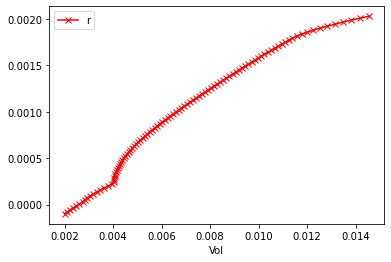

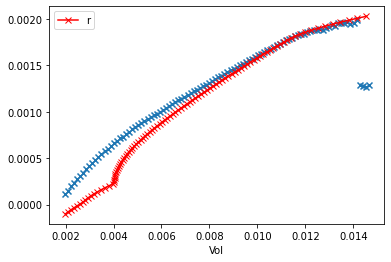

In [94]:
dic1 = {"Vol": vol1, "r": np.array([w.T@e_r for w in carteiras_scipy])}
df1 = pd.DataFrame(dic2)
ax = df1.plot(x="Vol", y="r", marker = "x", color="red",)

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": retornos.reshape(retornos.shape[0])}
df2 = pd.DataFrame(dic2)
ax = df2.plot(x="Vol", y="r", marker = "x", color="red",)

ax.scatter(x=ef_x, y=ef_y, marker="x", alpha=1)

In [99]:
sum(sum((carteiras_aleatoria)))

array([100.])